In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\matt\\anaconda3\\envs\\pythonadv\\lib\\site-packages\\~cipy\\fft\\_pocketfft\\pypocketfft.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

In [2]:
data = pd.read_csv('Resources/cleaned_loan.csv')

data.head()

,loan_amnt,int_rate,emp_length,annual_inc,loan_status,term,home_ownership,purpose
0,30000,22.35,5,100000.0,1,0,1,2
1,40000,16.14,0,45000.0,1,1,1,1
2,20000,7.56,10,100000.0,1,0,1,1
3,4500,11.31,10,38500.0,1,0,3,1
4,8425,27.27,3,450000.0,1,0,1,1


In [21]:
X = data.drop(columns=['loan_status']).astype(float)

Y = data['loan_status']

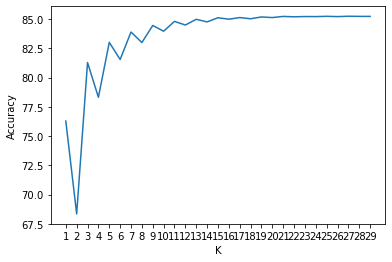

In [27]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.3,random_state=41)

k_range = range(1,30)
model_score = []

for n in k_range:
    knn = KNeighborsClassifier(n)
    scores = cross_val_score(knn,train_X,train_Y,cv=10,scoring='f1')
    model_score.append(scores.mean()*100)

plt.plot(k_range,model_score)
plt.xlabel('K')
plt.xticks(np.arange(1,30,step=1))
plt.ylabel('f1')
plt.show()


In [37]:
k_values = np.arange(1,30).tolist()

[*zip(model_score,k_values)]

[(76.28557574817198, 1),
 (68.34123920907993, 2),
 (81.2940625580126, 3),
 (78.31875364238287, 4),
 (83.02029297919444, 5),
 (81.55543210321233, 6),
 (83.90165404589655, 7),
 (83.00205127920948, 8),
 (84.4638846481008, 9),
 (83.97458113174089, 10),
 (84.81338438903559, 11),
 (84.5033964787451, 12),
 (84.99270646019032, 13),
 (84.76780184328818, 14),
 (85.12642751392534, 15),
 (85.00181576538759, 16),
 (85.14161584647825, 17),
 (85.03828623518687, 18),
 (85.1932848082502, 19),
 (85.14161861722907, 20),
 (85.23887474266651, 21),
 (85.20544009221058, 22),
 (85.22975527804947, 23),
 (85.22367717427747, 24),
 (85.24799143653271, 25),
 (85.2236799450283, 26),
 (85.25407231105558, 27),
 (85.24191333276072, 28),
 (85.24191517992794, 29)]

In [40]:
knn2 = KNeighborsClassifier()

grid={'n_neighbors':range(1,30,1),"weights":['uniform','distance']}
gs=GridSearchCV(estimator=knn2,param_grid=grid,scoring='accuracy',n_jobs=-1,cv=10,verbose=10)
gs.fit(train_X,train_Y)

print('max score:',gs.best_score_)
print('best params:',gs.best_params_)
print('best settings:',gs.best_estimator_)

Fitting 10 folds for each of 58 candidates, totalling 580 fits
max score: 0.8525407231105557
best params: {'n_neighbors': 27, 'weights': 'uniform'}
best settings: KNeighborsClassifier(n_neighbors=27)


In [51]:
knn_best = gs.best_estimator_
pred_Y = knn_best.predict(test_X)
test_score = knn_best.score(test_X,test_Y)
matrix = confusion_matrix(test_Y,pred_Y)

print(test_score)
print(matrix)

0.8531518116712756
[[    2  2065]
 [    6 12030]]


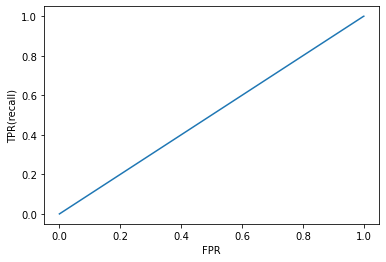

In [44]:
fprs,tprs,thresholds=roc_curve(test_Y,pred_Y)
plt.plot(fprs,tprs)
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')
plt.show()

In [47]:
roc_auc_score(test_Y,pred_Y)

0.5002345406933529

In [49]:
data['loan_status'].value_counts()

1    40093
0     6914
Name: loan_status, dtype: int64

In [52]:
print(classification_report(test_Y,pred_Y))

              precision    recall  f1-score   support

           0       0.25      0.00      0.00      2067
           1       0.85      1.00      0.92     12036

    accuracy                           0.85     14103
   macro avg       0.55      0.50      0.46     14103
weighted avg       0.77      0.85      0.79     14103



In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [15]:
x1 = data.drop(columns='loan_status')

y1 = data['loan_status']

train_X,test_X,train_Y,test_Y = train_test_split(x1,y1,test_size=0.3,random_state=41)

clf = DecisionTreeClassifier()

weights=np.arange(1,10,1)

grid1={'criterion':['entropy','gini'],'splitter':['random','best'],'max_depth':range(3,8)
       ,'min_samples_leaf':range(1,10),'min_samples_split':range(1,10),
      'class_weight':[{0:x, 1:1} for x in weights]}
gs1=GridSearchCV(estimator=clf,param_grid=grid1,cv=5,verbose=10,n_jobs=-1)
gs1.fit(train_X,train_Y)

gs1.best_score_
gs1.best_params_

Fitting 5 folds for each of 14580 candidates, totalling 72900 fits


C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.85269268 ... 0.51510551 0.45848441 0.51525747]
  category=UserWarning


{'class_weight': {0: 1, 1: 1},
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 9,
 'splitter': 'random'}

In [16]:
gs1.best_score_

0.8530573923549835

In [11]:
clf1 = gs1.best_estimator_

pred_Y = clf1.predict(test_X)
tree_score = clf1.score(test_X,test_Y)
matrix1 = confusion_matrix(test_Y,pred_Y)

print(tree_score)
print(matrix1)

0.8534354392682408
[[    0  2067]
 [    0 12036]]


In [12]:
print(classification_report(test_Y,pred_Y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2067
           1       0.85      1.00      0.92     12036

    accuracy                           0.85     14103
   macro avg       0.43      0.50      0.46     14103
weighted avg       0.73      0.85      0.79     14103



C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
data.head()

,loan_amnt,int_rate,emp_length,annual_inc,loan_status,term,home_ownership,purpose
0,30000,22.35,5,100000.0,1,0,1,2
1,40000,16.14,0,45000.0,1,1,1,1
2,20000,7.56,10,100000.0,1,0,1,1
3,4500,11.31,10,38500.0,1,0,3,1
4,8425,27.27,3,450000.0,1,0,1,1


In [14]:
data.describe()

,loan_amnt,int_rate,emp_length,annual_inc,loan_status,term,home_ownership,purpose
count,47007.000000,47007.000000,47007.000000,4.700700e+04,47007.000000,47007.000000,47007.000000,47007.000000
mean,14935.434084,13.433958,6.305572,8.001621e+04,0.852916,0.271130,1.848278,2.864850
std,10164.850522,5.521137,3.723621,7.756004e+04,0.354194,0.444548,0.918241,2.336235
min,1000.000000,5.310000,0.000000,3.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,7000.000000,9.440000,3.000000,4.750000e+04,1.000000,0.000000,1.000000,2.000000
50%,12000.000000,12.610000,7.000000,6.700000e+04,1.000000,0.000000,1.000000,2.000000
75%,20000.000000,16.910000,10.000000,9.500000e+04,1.000000,1.000000,3.000000,3.000000
max,40000.000000,30.990000,10.000000,9.300000e+06,1.000000,1.000000,3.000000,12.000000


In [15]:
min(data['annual_inc'])

33.0

In [24]:
x_1 = {'loan_amnt':[100000],'int_rate':[31],'emp_length':[0],'annual_inc':[33],'term':[0],'home_ownership':[0],'purpose':[12]}

x_2 = pd.DataFrame(x_1)

x_2

,loan_amnt,int_rate,emp_length,annual_inc,term,home_ownership,purpose
0,100000,31,0,33,0,0,12


In [25]:
y_2 = clf1.predict(x_2)

y_2

array([1], dtype=int64)